In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(os.path.join("Resources", "Spotify_Audio_Features.csv"))
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,Ariana Grande,"thank u, next",2rPE9A1vEgShuZxxzR2tZH,100,0.28000,0.724,207333,0.647,0.000000,1,0.1020,-5.642,1,0.0658,106.960,4,0.435
1,1,Los Unidades,E-Lo (feat. Jozzy),3eydp9rHJAskzOevEBK267,68,0.46900,0.698,214720,0.797,0.001180,3,0.1520,-5.125,0,0.0615,101.969,4,0.530
2,2,Travis Scott,SICKO MODE,2xLMifQCjDGFmkHkpNLD9h,95,0.00513,0.834,312820,0.730,0.000000,8,0.1240,-3.714,1,0.2220,155.008,4,0.446
3,3,Sheck Wes,Mo Bamba,1xzBco0xcoJEDXktl7Jxrr,93,0.19400,0.729,183907,0.625,0.009860,4,0.2480,-5.266,1,0.0315,146.034,4,0.261
4,4,Kodak Black,ZEZE (feat. Travis Scott & Offset),7l3E7lcozEodtVsSTCkcaA,94,0.05150,0.861,228654,0.637,0.000003,8,0.0967,-5.692,0,0.2400,98.044,4,0.474


In [3]:
drop_list = ['Unnamed: 0', 'track_name', 'track_id', 'acousticness', 'duration_ms', 'instrumentalness', 'key', 'mode',
            'time_signature']
data = df.drop(drop_list, axis=1)
data.head()

,artist_name,popularity,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,Ariana Grande,100,0.724,0.647,0.1020,-5.642,0.0658,106.960,0.435
1,Los Unidades,68,0.698,0.797,0.1520,-5.125,0.0615,101.969,0.530
2,Travis Scott,95,0.834,0.730,0.1240,-3.714,0.2220,155.008,0.446
3,Sheck Wes,93,0.729,0.625,0.2480,-5.266,0.0315,146.034,0.261
4,Kodak Black,94,0.861,0.637,0.0967,-5.692,0.2400,98.044,0.474


In [4]:
#Encode track id, track name and artistname into quantitative
le = preprocessing.LabelEncoder()
#data['track_id'] = le.fit_transform(data['track_id'].astype('str'))
#data['track_name'] = le.fit_transform(data['track_name'].astype('str'))
data['artist_name'] = le.fit_transform(data['artist_name'].astype('str'))

In [5]:
target = data["popularity"]
target_names = ["negative", "positive"]

In [6]:
train = data.drop("popularity", axis=1)
feature_names = data.columns
train.head()

,artist_name,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,165,0.724,0.647,0.1020,-5.642,0.0658,106.960,0.435
1,1428,0.698,0.797,0.1520,-5.125,0.0615,101.969,0.530
2,2392,0.834,0.730,0.1240,-3.714,0.2220,155.008,0.446
3,2083,0.729,0.625,0.2480,-5.266,0.0315,146.034,0.261
4,1302,0.861,0.637,0.0967,-5.692,0.2400,98.044,0.474


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=42)

k: 1, Train/Test Score: 0.999/0.053
k: 3, Train/Test Score: 0.382/0.052
k: 5, Train/Test Score: 0.277/0.051
k: 7, Train/Test Score: 0.230/0.049
k: 9, Train/Test Score: 0.207/0.051
k: 11, Train/Test Score: 0.194/0.048
k: 13, Train/Test Score: 0.178/0.049
k: 15, Train/Test Score: 0.165/0.050
k: 17, Train/Test Score: 0.156/0.050
k: 19, Train/Test Score: 0.150/0.050


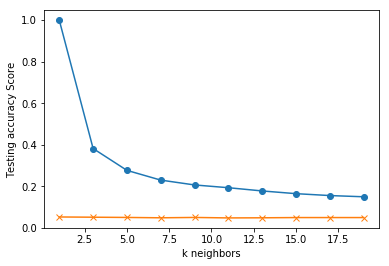

In [8]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [9]:
# Note that k: 1 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('k=1 Test Acc: %.3f' % knn.score(X_test, y_test))

k=1 Test Acc: 0.053
